In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [12]:
df = pd.read_csv("UCRArchive_2018/BeetleFly/BeetleFly_TRAIN.tsv", sep = '\t', header = None)
n_timesteps = df.shape[1] - 1
df.columns = ["labels"] + [f"t_{i+1}" for i in range(n_timesteps)]
df["labels"] = df["labels"].astype("category")
df.head(5)

,labels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_503,t_504,t_505,t_506,t_507,t_508,t_509,t_510,t_511,t_512
0,1,1.246789,1.174937,1.068819,0.964319,0.895219,0.790473,0.720885,0.688010,0.587988,...,0.553637,0.650269,0.718853,0.805717,0.865237,0.956820,1.057206,1.126484,1.221802,1.286670
1,1,0.825876,0.881314,0.818073,0.674205,0.546963,0.485933,0.375458,0.265118,0.154929,...,-0.168363,-0.093108,-0.001327,0.084480,0.192384,0.321336,0.450300,0.558373,0.646437,0.755256
2,1,2.132830,2.029373,1.940484,1.852180,1.799809,1.696186,1.610549,1.527823,1.439301,...,1.347620,1.431956,1.531713,1.612717,1.694647,1.796306,1.879709,1.962100,2.063447,2.149849
3,1,0.874412,0.923000,0.964207,0.944243,0.811593,0.663741,0.516367,0.352022,0.269166,...,0.172339,0.226525,0.233978,0.293486,0.360640,0.425044,0.586582,0.610465,0.679952,0.801962
4,1,0.972615,1.112579,1.183380,1.164712,1.028599,0.909215,0.851048,0.713570,0.577246,...,-0.225026,-0.182151,-0.062613,0.061609,0.187914,0.316121,0.446066,0.577601,0.707684,0.838184


In [14]:
classes = df.pop('labels').values
classes

[1, 1, 1, 1, 1, ..., 2, 2, 2, 2, 2]
Length: 20
Categories (2, int64): [1, 2]

In [16]:
type(classes)

pandas.core.arrays.categorical.Categorical

In [17]:
df.columns

Index(['t_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7', 't_8', 't_9', 't_10',
       ...
       't_503', 't_504', 't_505', 't_506', 't_507', 't_508', 't_509', 't_510',
       't_511', 't_512'],
      dtype='object', length=512)

In [18]:
mins = np.min(df.values, axis = 1, keepdims = True)
maxs = np.max(df.values, axis = 1, keepdims = True)
df_norm = pd.DataFrame((df.values - mins) / (maxs - mins), columns = df.columns)
df_norm.head(5)

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_503,t_504,t_505,t_506,t_507,t_508,t_509,t_510,t_511,t_512
0,0.735632,0.718630,0.693519,0.668792,0.652441,0.627655,0.611189,0.603409,0.579742,0.563297,...,0.571613,0.594479,0.610708,0.631262,0.645346,0.667017,0.690771,0.707164,0.729719,0.745069
1,0.636901,0.650729,0.634955,0.599071,0.567333,0.552111,0.524556,0.497035,0.469551,0.442107,...,0.388914,0.407684,0.430577,0.451979,0.478893,0.511057,0.543223,0.570179,0.592145,0.619287
2,0.991254,0.965130,0.942684,0.920386,0.907161,0.880995,0.859370,0.838481,0.816127,0.790249,...,0.792977,0.814273,0.839463,0.859918,0.880606,0.906277,0.927337,0.948142,0.973734,0.995552
3,0.664713,0.677263,0.687906,0.682750,0.648488,0.610299,0.572233,0.529785,0.508384,0.509091,...,0.483374,0.497370,0.499295,0.514666,0.532011,0.548646,0.590369,0.596538,0.614486,0.646000
4,0.702014,0.732440,0.747832,0.743773,0.714184,0.688231,0.675586,0.645700,0.616064,0.587467,...,0.441659,0.450979,0.476966,0.503970,0.531428,0.559299,0.587547,0.616142,0.644420,0.672790


In [19]:
df_norm['signal_id'] = df.index
df_norm['labels'] = classes
df_norm.head(5)

,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,...,t_505,t_506,t_507,t_508,t_509,t_510,t_511,t_512,signal_id,labels
0,0.735632,0.718630,0.693519,0.668792,0.652441,0.627655,0.611189,0.603409,0.579742,0.563297,...,0.610708,0.631262,0.645346,0.667017,0.690771,0.707164,0.729719,0.745069,0,1
1,0.636901,0.650729,0.634955,0.599071,0.567333,0.552111,0.524556,0.497035,0.469551,0.442107,...,0.430577,0.451979,0.478893,0.511057,0.543223,0.570179,0.592145,0.619287,1,1
2,0.991254,0.965130,0.942684,0.920386,0.907161,0.880995,0.859370,0.838481,0.816127,0.790249,...,0.839463,0.859918,0.880606,0.906277,0.927337,0.948142,0.973734,0.995552,2,1
3,0.664713,0.677263,0.687906,0.682750,0.648488,0.610299,0.572233,0.529785,0.508384,0.509091,...,0.499295,0.514666,0.532011,0.548646,0.590369,0.596538,0.614486,0.646000,3,1
4,0.702014,0.732440,0.747832,0.743773,0.714184,0.688231,0.675586,0.645700,0.616064,0.587467,...,0.476966,0.503970,0.531428,0.559299,0.587547,0.616142,0.644420,0.672790,4,1


In [20]:
df_long = pd.melt(df_norm, id_vars = ['signal_id', 'labels'], var_name = 'timesteps', value_name = 'value')
df_long.head(5)

,signal_id,labels,timesteps,value
0,0,1,t_1,0.735632
1,1,1,t_1,0.636901
2,2,1,t_1,0.991254
3,3,1,t_1,0.664713
4,4,1,t_1,0.702014


In [22]:
df_long.timesteps = df_long.timesteps.str.replace('t_', '').astype(int)
df_long.head(5)

,signal_id,labels,timesteps,value
0,0,1,1,0.735632
1,1,1,1,0.636901
2,2,1,1,0.991254
3,3,1,1,0.664713
4,4,1,1,0.702014


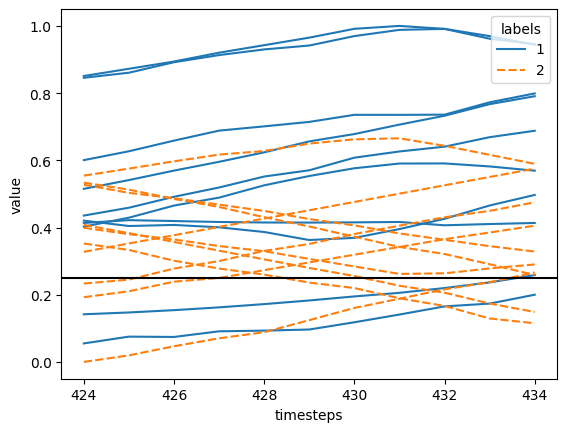

In [27]:
subset_df = df_long[(df_long['timesteps'] >= 424) & (df_long['timesteps'] <= 434)]
sns.lineplot(data=subset_df, x='timesteps', y='value', hue='labels', style='labels', units='signal_id', estimator=None)
plt.axhline(y=0.25, color='black', linestyle='solid')
plt.show()